In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Define parameters
fo = 77e9  # Radar frequency (Hz)
B = 4e9  # Chirp bandwidth (Hz)
T = 40e-6   # Chirp duration (s)
c = 3e8    # Speed of light (m/s)
fs = 50e6   # Sampling frequency (Hz)
t = np.linspace(0, T, int(fs*T)) # Time resolution
slope = B / T

print('Range resolution: ', c / (2 * B), 'm')

# Generate signal
S_gen = np.exp(2j * np.pi * (fo * t + (slope / 2) * t**2))


Range resolution:  0.0375 m


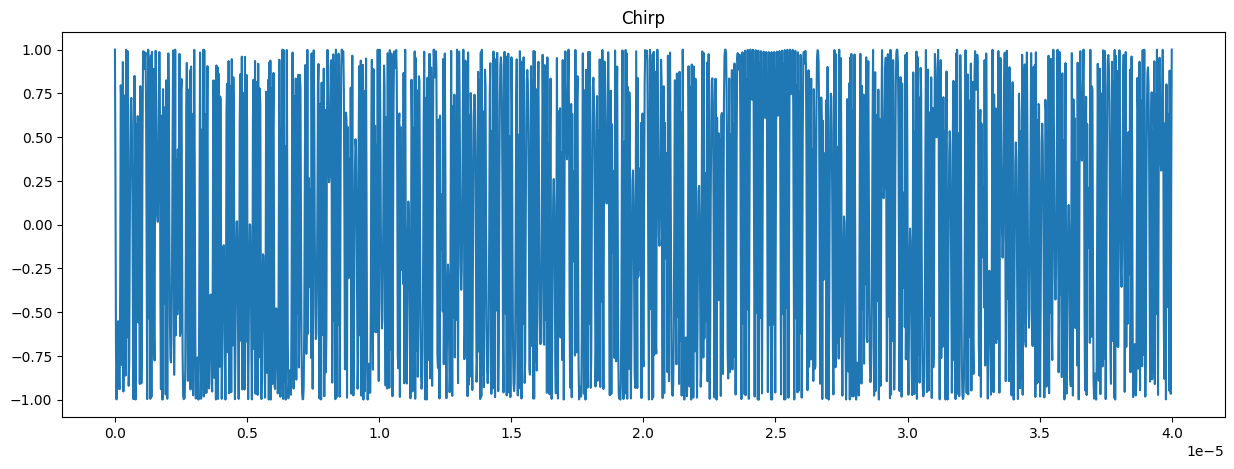

In [27]:
plt.figure(figsize=(15,5))
plt.plot(t, np.real(S_gen))
plt.title('Chirp')
# plt.xlim([0, 40e-10])
plt.show()

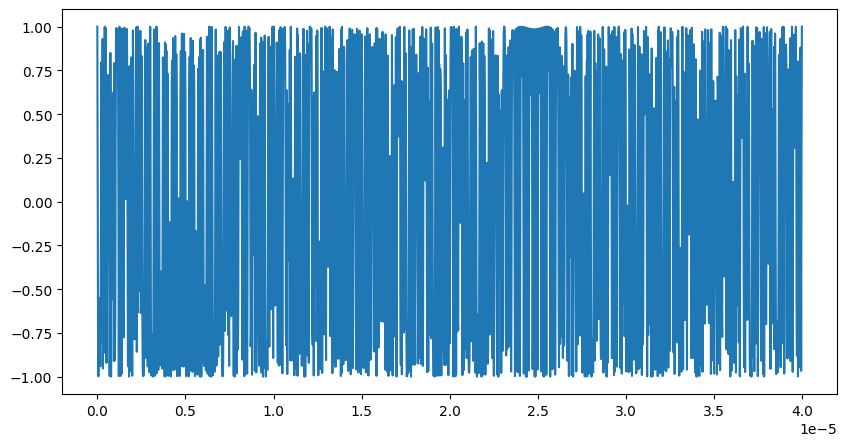

In [28]:
# Extend signal to n chirps per cicle
n = 1
S = np.tile(S_gen, n)
t = np.arange(0, len(S)) / fs  # Adjust time vector length to match S

plt.figure(figsize=(10, 5))
plt.plot(t, np.real(S))
# plt.xlim([20e-11, 40e-11])
plt.show()

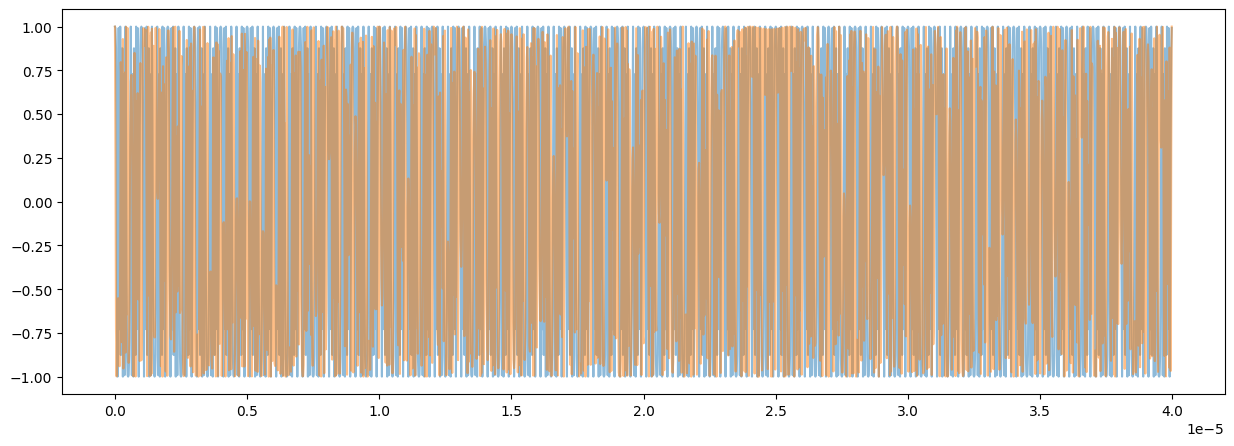

In [29]:
# Define target parameters
# fd = 2e3  # Doppler shift (Hz)
velocity = 0 # m/s
fd = np.sqrt((1+velocity/c)/(1-velocity/c)) # Hz
# fd = 0
object_distance = 30 # m
delta_t = 2 * object_distance / c  # Time delay corresponding to object distance

# Generate delayed and Doppler shifted signal
# S_target = np.exp(2j * np.pi * ((fo + fd) * (t - delta_t) + (slope / 2) * (t - delta_t)**2))
S_target = np.exp(2j * np.pi * (fo * t + (slope / 2) * t**2))

# S_target = np.concatenate((np.zeros(int(delta_t * fs)), S_gen))[:-int(delta_t * fs)]
# S_target = np.concatenate((np.zeros(int(delta_t * fs)), S))[:-int(delta_t * fs)]

plt.figure(figsize=(15, 5))
plt.plot(t, np.real(S_target), alpha=0.5)
plt.plot(t, np.real(S), alpha=0.5)
# plt.xlim([5e-6 + 2e-10, 5e-6 + 4e-10])
plt.show()

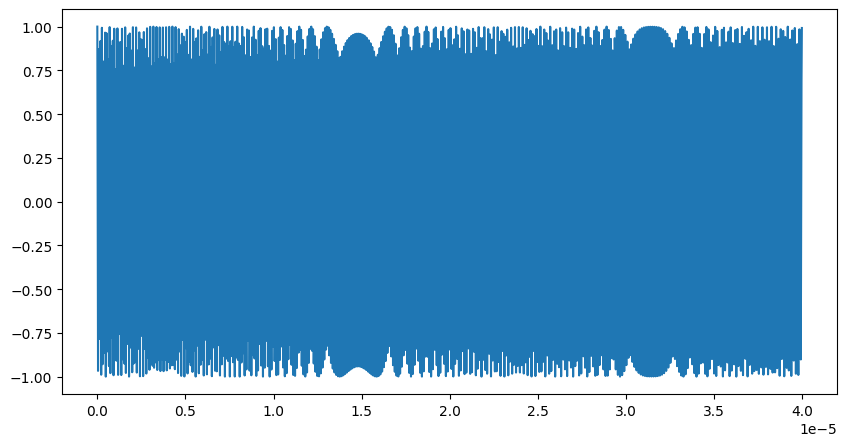

In [30]:
# Intermidiate frequency signal
# S_IF = S_target * np.conj(S)
S_IF = S * np.conj(S_target)
# S_IF = S_gen * S_target

plt.figure(figsize=(10, 5))
plt.plot(t, np.real(S_IF))
# plt.plot(t, np.real(S))
# plt.plot(t, np.real(S_target))
# plt.plot(S_IF)
# plt.xlim([0.5e-5 + 2e-7, 0.5e-5 + 4e-7])
plt.show()

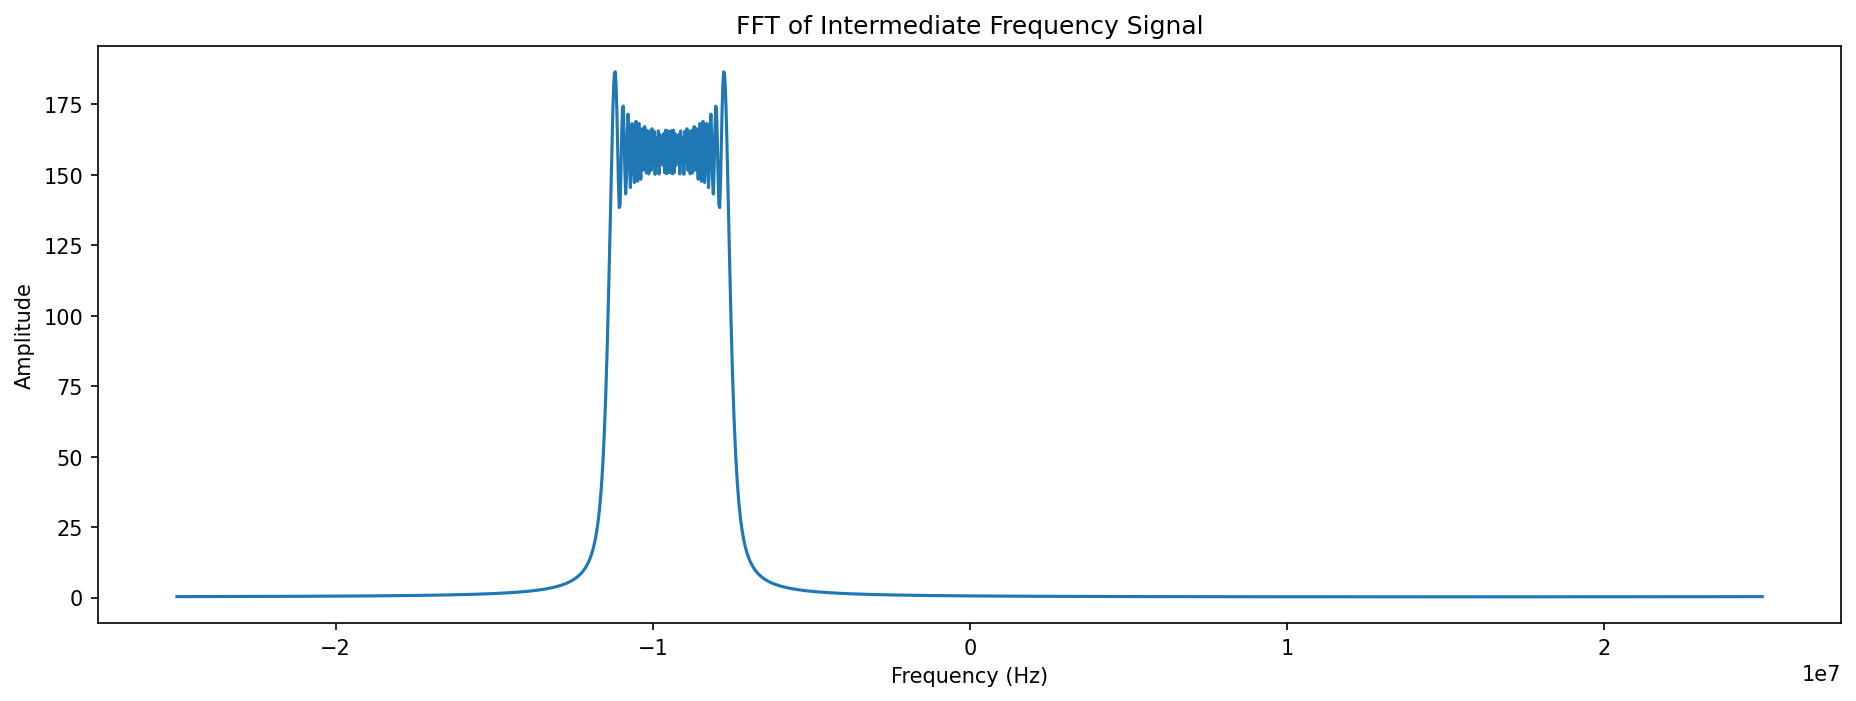

In [31]:
# Perform FFT
FFT1 = np.fft.fft(S_IF[int(delta_t * fs):])
FFT1_freq = np.fft.fftfreq(len(FFT1), 1/fs)
FFT1 = np.fft.fftshift(FFT1)
FFT1_freq = np.fft.fftshift(FFT1_freq)

# Plot the FFT1
plt.figure(figsize=(15, 5), dpi=150)
plt.plot(FFT1_freq, np.abs(FFT1))
# plt.xlim([-1e8, 1e8])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Intermediate Frequency Signal')
plt.show()

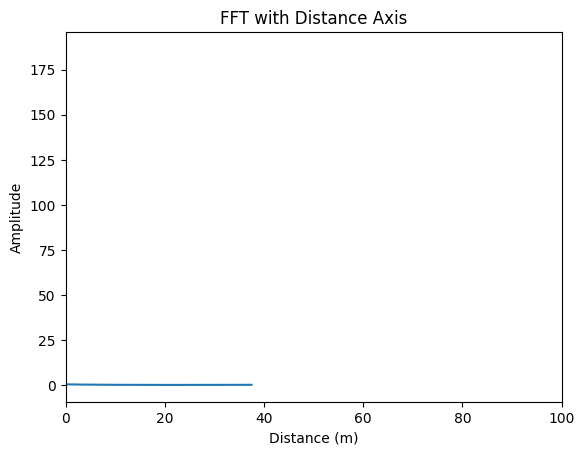

In [32]:
# Convert frequency to distance
distance = (c * FFT1_freq * T) / (2 * B)

# Plot the FFT in terms of distance
plt.plot(distance, np.abs(FFT1))
plt.xlim([0, 100])
plt.xlabel('Distance (m)')
plt.ylabel('Amplitude')
plt.title('FFT with Distance Axis')
plt.show()
